<a href="https://colab.research.google.com/github/IsabellaHerrerae/Anal-tica-/blob/main/M%C3%A9todos_KNN_KMeans_clase_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0. Cargar ibrerias

In [ ]:
#!pip install
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Préstamo interbibliotecario
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

1. se cargan los archivos - análisis A-priori

In [ ]:
nxl= '/content/0. SolicitantesCrédito(USD) (1) (1).xlsx'
XDB=pd.read_excel(nxl,sheet_name=1)
XDB=XDB.dropna()
XDB.head(100)   #MOSTRAR LAS PRIMERAS 100 FILAS

XDB=XDB[['Edad','Ingresos','Egresos','Monto (EAD)','PreApr']]
sns.pairplot(XDB, hue='PreApr',size=4,vars=['Edad','Ingresos','Egresos','Monto (EAD)'])

#Para confirmar la  buena correlación
corr=XDB.corr()
print("Esta es la matriz de correlación:\n",corr)

#los índices de 75 o más de 75% siempre son deseados

#se procede con la configuración de los datos de salida
XD=np.array(XDB.iloc[:,0:4]) #Tomas las variables de entrada, Edad, Ingresos, Egresos, Monto (EAD)
yd=np.array(XDB.iloc[:,4]) #PreApr

#ILOC es para que tome las columnas del valor XDB.


NameError: name 'pd' is not defined

2. implementamos el modelo KNN

[1 0 0 ... 1 0 1]
Esta es la matriz de confusión:
 [[2437  522]
 [ 648 2235]]
Esta es la exactitud:
 0.7997261211913728
Esta es la sensibilidad:
 0.7752341311134235
Esta es la especificidad:
 0.8235890503548496
Esta es la predicción:
 [1]


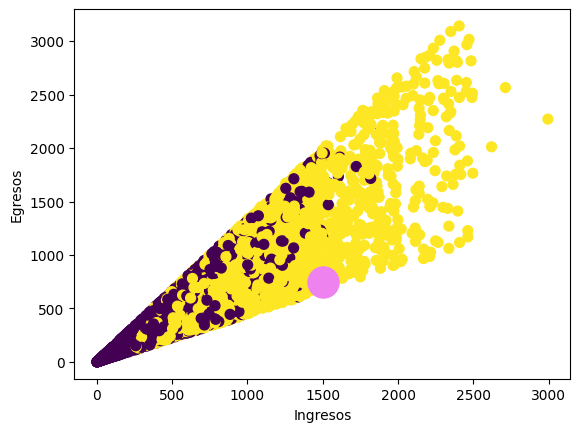

In [ ]:
from os import sendfile
mknn=KNeighborsClassifier(n_neighbors=10)  #Tomar 10 vecinos
mknn.fit(XD,yd)                            #Se ajusta el modelo

#Evaluamos el funcionamiento del modelo
ydp=mknn.predict(XD)
print(ydp)

#Matriz de confusión
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print("Esta es la matriz de confusión:\n",cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
exactitud=(VP+VN)/(VP+VN+FP+FN)
print("Esta es la exactitud:\n",exactitud)
sensibilidad=VP/(VP+FN)
print("Esta es la sensibilidad:\n",sensibilidad)
especificidad=VN/(VN+FP)
print("Esta es la especificidad:\n",especificidad)

#model me vas a presatr o no
XDP=np.array([[50,1500,750,500]])
ydpp=mknn.predict(XDP)
print("Esta es la predicción:\n",ydpp)

#Las gráficas siempre se hacen con las variables que tienen más correlación
plt.scatter(XD[:,1],XD[:,2],c=yd,s=50,cmap='viridis')
plt.scatter(XDP[:,1],XDP[:,2],marker='o',s=500,facecolors='violet')
plt.xlabel("Ingresos")
plt.ylabel("Egresos")
plt.show()

3. Se procede con la construcción del Kmeans
(se hacen montoncitos de datos o clusters)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Donde quedó el primer solicitante 2
Donde quedó el segundo solicitante 4
Donde quedó el tercer solicitante 0


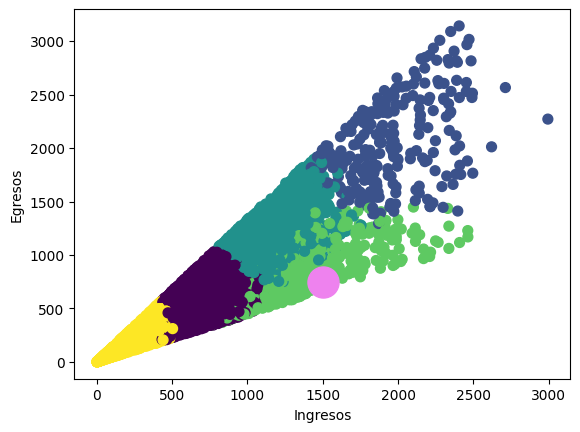

El modelo me presta [2]
El número de aprobados para el cluster 1 es: 226
El número de aprobados para el cluster 2 es: 745
El porcentaje de aprobados para el cluster 1 es: 0.23274974253347064
El porcentaje de aprobados para el cluster 2 es: 0.7672502574665293
El número de aprobados para el cluster 5 es: 1806
El número de aprobados para el cluster 5 es: 269
El porcentaje de aprobados para el cluster 5 es: 0.8703614457831326
El porcentaje de aprobados para el cluster 5 es: 0.12963855421686746
Esta es la característica sociodemográfica de cada cluster:
 [[  41.13045611  700.94181927  594.22875091  529.66765171]
 [  40.90441176 1930.5114329  2026.03599101 1140.80106045]
 [  40.96395469 1167.56457775 1226.93772674  655.30527084]
 [  40.81030928 1375.63224691  823.62006048 1499.46367136]
 [  41.07228916  236.55192554  207.18873039  170.96460534]]


In [ ]:
np.random.seed(42)  #Para que a todos nos de el mismo modelo

mkmeans=KMeans(n_clusters=5,init='random',random_state=42)
mkmeans.fit(XD)
labels=mkmeans.labels_   #donde quedaron clasificados cada uno de los solicitantes de crédito
print("Donde quedó el primer solicitante",labels[0,])
print("Donde quedó el segundo solicitante",labels[1,])
print("Donde quedó el tercer solicitante",labels[2,])

#Se mapean los clusters - como quedaron los clasificados solicitantes
plt.scatter(XD[:,1],XD[:,2],c=labels,s=50,cmap='viridis')
plt.scatter(XDP[:,1],XDP[:,2],marker='o',s=500,facecolors='violet')
plt.xlabel("Ingresos");plt.ylabel("Egresos")
plt.show()   #Los amarillos son los que tienen más posibilidad que les nieguen el crédito y tienen ingresos más bajos

#Dónde quedé yo?
XDP=np.array([[50,1500,750,500]])
ydpp2=mkmeans.predict(XDP)
print("El modelo me presta",ydpp2)

#Cuak es el porcentaje de preaprobados y negados en el cluster 2
c20=len(np.where((labels==2) & (yd==0))[0])
c21=len(np.where((labels==2) & (yd==1))[0])
print("El número de aprobados para el cluster 1 es:",c20)
print("El número de aprobados para el cluster 2 es:",c21)

print("El porcentaje de aprobados para el cluster 1 es:",c20/(c20+c21))
print("El porcentaje de aprobados para el cluster 2 es:",c21/(c20+c21))

c50=len(np.where((labels==4) & (yd==0))[0])
c51=len(np.where((labels==4) & (yd==1))[0])
print("El número de aprobados para el cluster 5 es:",c50)
print("El número de aprobados para el cluster 5 es:",c51)

print("El porcentaje de aprobados para el cluster 5 es:",c50/(c50+c51))
print("El porcentaje de aprobados para el cluster 5 es:",c51/(c50+c51))

#Cual es la característica sociodemográfica de cada cluster
clusters=mkmeans.cluster_centers_
print("Esta es la característica sociodemográfica de cada cluster:\n",clusters)




